https://www.youtube.com/watch?v=CbTU92pbDKw
https://colab.research.google.com/drive/1Bk4zPQwAfzoSHZokKUefKL1s6lqmam6S?usp=sharing#scrollTo=-0LJeyey_o6t

In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('ticket data.csv',index_col=0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 636
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    637 non-null    object
 1   Count   637 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.9+ KB


In [19]:
import datetime

def str_to_datetime(s):
    split_temp = s.split(' ')
    date = split_temp[0].split('/')
    time = []
    time.append(split_temp[1][0:2])
    time.append(split_temp[1][3:5])
    time.append(split_temp[1][6:8])
    year, month, day = int('20' + date[0]), int(date[1]), int(date[2])
    hour, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return datetime.datetime(year=year, month=month, day=day, hour=hour,minute=minutes,second=seconds)

datetime_object = str_to_datetime('22/07/01 10:34:56')
datetime_object

datetime.datetime(2022, 7, 1, 10, 34, 56)

In [20]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0     2022-07-01 00:00:00
1     2022-07-01 01:00:00
2     2022-07-01 02:00:00
3     2022-07-01 03:00:00
4     2022-07-01 04:00:00
              ...        
632   2022-07-27 22:00:00
633   2022-07-30 00:00:00
634   2022-07-30 03:00:00
635   2022-07-30 18:00:00
636   2022-07-30 21:00:00
Name: Date, Length: 637, dtype: datetime64[ns]

In [21]:
df.index = df.pop('Date')
df.head()

,Count
Date,
2022-07-01 00:00:00,362
2022-07-01 01:00:00,486
2022-07-01 02:00:00,363
2022-07-01 03:00:00,225
2022-07-01 04:00:00,116


In [22]:
window_df=df[["Count"]]
window_df.rename(columns = {'Count':'Target'}, inplace = True)
window_df["Target-1"] = 0
window_df["Target-2"] = 0
window_df["Target-3"] = 0
window_df

,Target,Target-1,Target-2,Target-3
Date,,,,
2022-07-01 00:00:00,362,0,0,0
2022-07-01 01:00:00,486,0,0,0
2022-07-01 02:00:00,363,0,0,0
2022-07-01 03:00:00,225,0,0,0
2022-07-01 04:00:00,116,0,0,0
...,...,...,...,...
2022-07-27 22:00:00,1,0,0,0
2022-07-30 00:00:00,1,0,0,0
2022-07-30 03:00:00,1,0,0,0


In [23]:
window_df.iloc[0]['Target']

362

In [24]:
for row in range(0,len(window_df)):
    try:
        window_df.iloc[row,1] = window_df.iloc[row-1,0]
    except:
        print('Skip')
    try:
        window_df.iloc[row,2] = window_df.iloc[row-1,1]
    except:
        print('Skip')
    try:
        window_df.iloc[row,3] = window_df.iloc[row-1,2]
    except:
        print('Skip')

In [25]:
window_df.head(20)

,Target,Target-1,Target-2,Target-3
Date,,,,
2022-07-01 00:00:00,362,1,0,0
2022-07-01 01:00:00,486,362,1,0
2022-07-01 02:00:00,363,486,362,1
2022-07-01 03:00:00,225,363,486,362
2022-07-01 04:00:00,116,225,363,486
2022-07-01 05:00:00,416,116,225,363
2022-07-01 06:00:00,1050,416,116,225
2022-07-01 07:00:00,2119,1050,416,116
2022-07-01 08:00:00,4318,2119,1050,416


In [26]:
window_df=window_df[2:]

In [36]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:,0]
    middle_matrix = df_as_np[:, 1:-1]
    print(dates)
    print(middle_matrix)
windowed_df_to_date_X_y(window_df)

[ 363  225  116  416 1050 2119 4318 4097 2536 3749 2940 2380 2359 1691
 1171  826  287   58  300  366  243  200  274  196  202  229  141  347
 1391 2421 2978 1932 1445 1323 1504 1353 1097  756  520  426  152   72
  218  247  215  142  149  144   77   62   12   39  288  378  273  409
  599  615  680  351  442  245  193  259   90   58   42   68   54   48
   50   70   48   39   12   33  149  401  317  293  166  168  181  293
  223  139  162  186  107   43   70   88   41   71   91  259  201   62
   50  324  825 1897 4415 4780 2867 3933 3318 2873 2657 1660 1161  722
  394  102  357  404  262  169  125  214  191  124   24  250  855 2010
 3484 3030 2709 2977 2676 3067 2727 1773 1157  815  295  132  471  396
  253  159  343  392  209  177   90  361  971 2251 4634 4290 2742 3987
 3401 3038 2587 1838 1269  831  277   96  460  490  268  132  249  390
  267  181   56  333  967 2218 4635 4483 2757 3974 3213 2364 2375 1219
 1172  624  316   70  241  245  219  180  125  191  127  223  188  340
 1085 

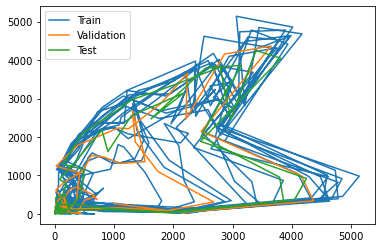

In [28]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])